In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score



# Шаг 1: Загрузка датасета локально с компьютера
from google.colab import files
uploaded = files.upload()  # Загрузите файл CSV, выбрав его на вашем компьютере

# Загрузка датасета в DataFrame с указанием разделителя ,
df = pd.read_csv(list(uploaded.keys())[0], sep=';')

# Просмотр первых строк датасета
print(df.head())


Saving balanced_risk_dataset_60_61_59.csv to balanced_risk_dataset_60_61_59 (2).csv
    x1  x2     x3    x4  x5      x6    x7  x8  y
0  458   6  99,43  4,67   5  220376  4,45   5  A
1  588  11  97,62  4,87   1  287024  4,77   4  A
2  398  24  74,22  3,03  16  129158  2,89   2  C
3  409  18     79  4,44   6  186619  3,79   4  B
4  345  28  76,33  3,26  19  153268  2,95   3  C


In [6]:
# Шаг 2.
# Предположим, что целевая переменная называется 'target'. Меняйте на свое имя выходного (прогнозируемого) столбца
X = df.drop(columns=['y'])  # Все колонки, кроме 'target'
Y = df['y']  # Целевая переменная

In [7]:
# Шаг 3: Нормализация числовых данных
# Определим числовые и категориальные колонки
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Нормализация числовых данных
scaler = StandardScaler()
X[numeric_features] = scaler.fit_transform(X[numeric_features])

# Кодирование категориальных переменных
encoder = OneHotEncoder(handle_unknown='ignore')  # можно добавить параметр drop='first', чтобы удалить первую категорию для избегания переобучения
#удаление первой категории — это подход, позволяющий избежать мультиколлинеарности и сохранить интерпретируемость модели.
#Однако это не критично для всех моделей, и в некоторых случаях, особенно для моделей, которые саморегулируются (например, деревья решений), можно оставить все категории.

X_encoded = encoder.fit_transform(X[categorical_features]).toarray()

# Преобразуем обратно в DataFrame
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_features))

# Объединяем числовые и закодированные категориальные данные
X_final = pd.concat([X[numeric_features].reset_index(drop=True), X_encoded_df.reset_index(drop=True)], axis=1)

#print(X_final.head(10))

# Шаг 4: Разделение данных на обучающую и тестовую выборки
X_train, X_test, Y_train, Y_test = train_test_split(X_final, Y, test_size=0.2, random_state=42)

# Шаг 5: Создание и обучение модели (RandomForest для примера)
#n_estimators=50
#n_estimators=100
#n_estimators=300
model = RandomForestClassifier(n_estimators=300, random_state=42)
model.fit(X_train, Y_train)

# Шаг 6: Прогнозирование и оценка модели
Y_pred = model.predict(X_test)

# Вывод точности модели
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


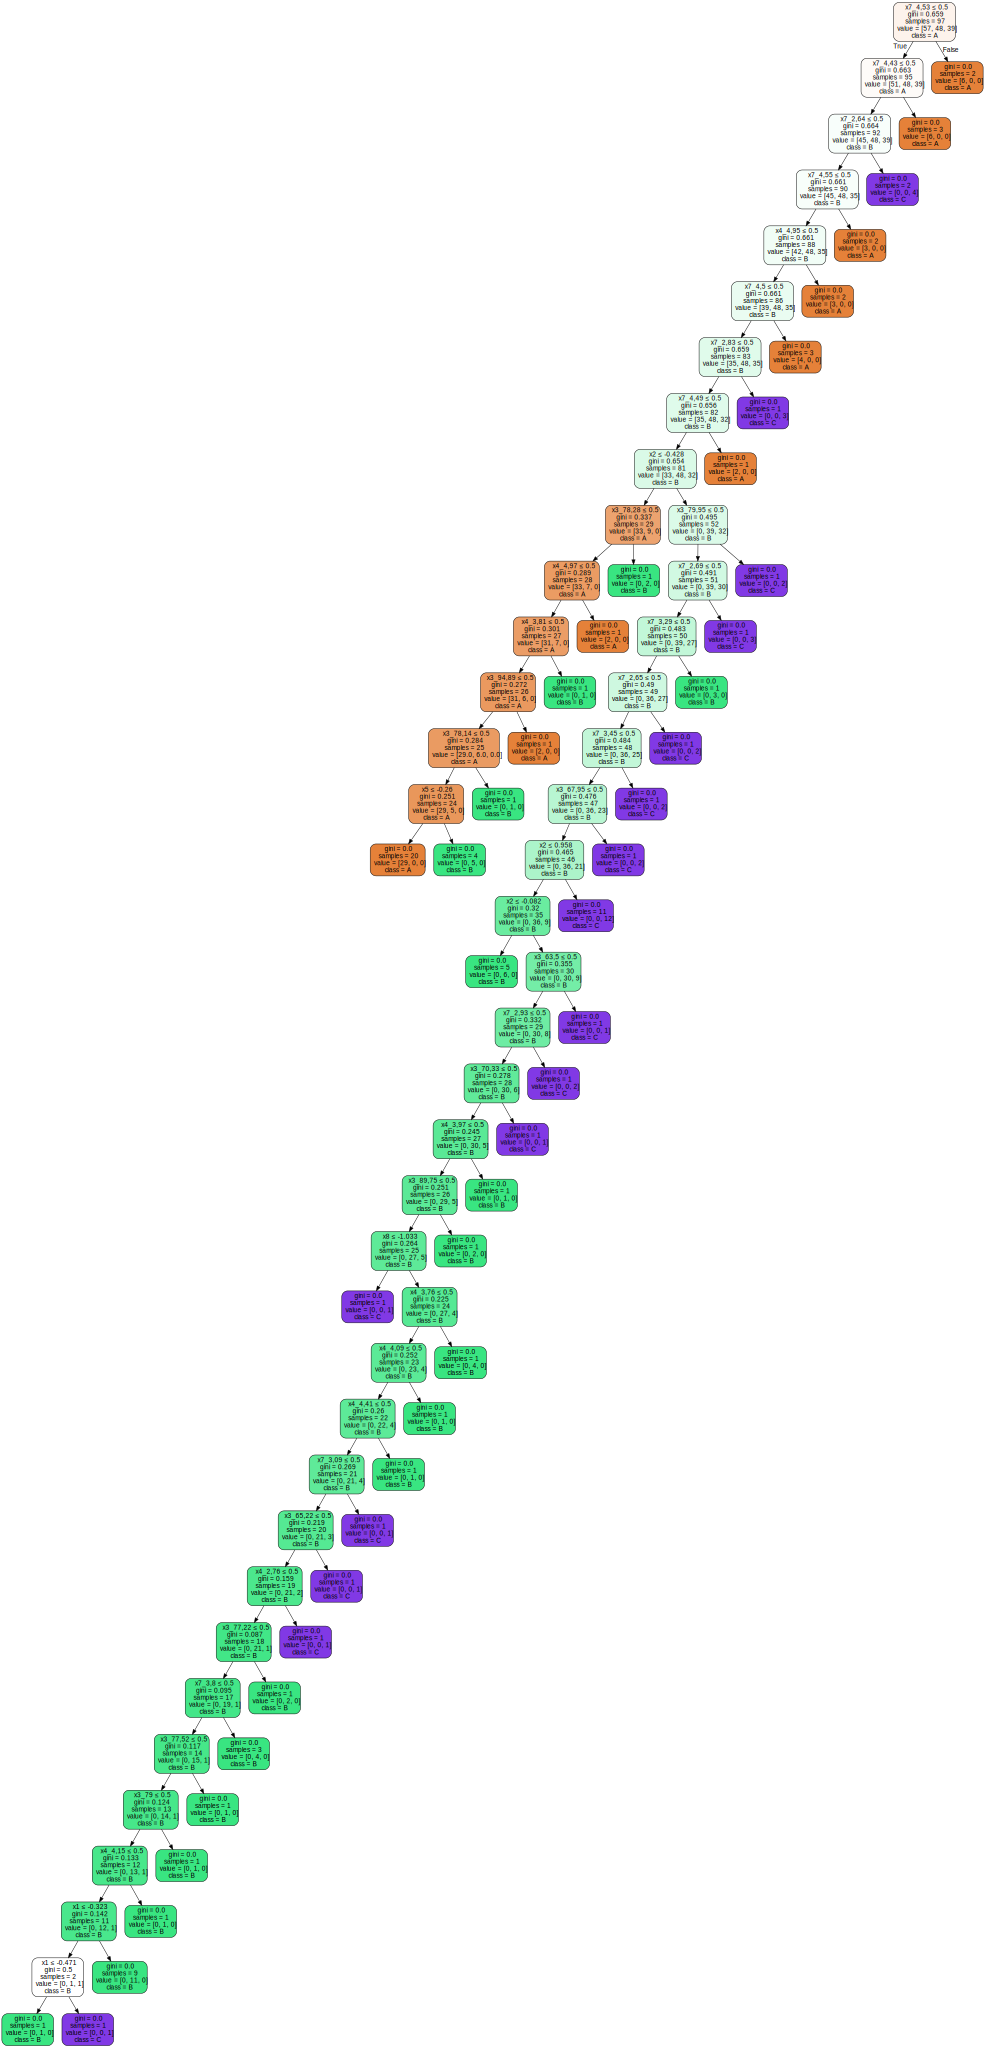

In [8]:
# Визуализация - этап 1
!pip install graphviz
from sklearn.tree import export_graphviz
import graphviz

# Предположим, что модель уже обучена (model.fit(X_train, y_train))

# Выбираем одно дерево из леса (например, первое дерево)
single_tree = model.estimators_[0]  # Индекс 0 означает первое дерево

# Экспортируем дерево в формат DOT
dot_data = export_graphviz(
    single_tree,
    out_file=None,
    feature_names=X_train.columns,  # Имена признаков (если есть)
    class_names=model.classes_.astype(str),  # Имена классов
    filled=True,
    rounded=True,
    special_characters=True
)

# Визуализируем дерево
graph = graphviz.Source(dot_data)
graph.render("single_tree")  # Сохраняет изображение в файл single_tree.pdf
graph  # Отображает дерево в блокноте (если поддерживается)


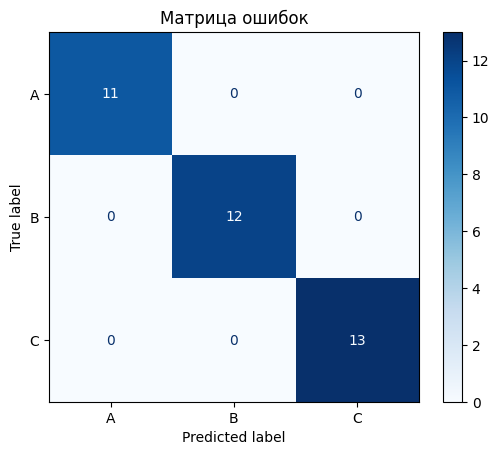

<Figure size 640x480 with 0 Axes>

In [9]:
# Визуализация - этап 2
# Визуализация матрицы ошибок
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(Y_test, Y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title('Матрица ошибок')
plt.show()
plt.savefig('confusion_matrix.png')


In [10]:
# Визуализация - этап 3
# Вывод отчета обо всех ключевых метриках качества при решении задачи классификации
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))


              precision    recall  f1-score   support

           A       1.00      1.00      1.00        11
           B       1.00      1.00      1.00        12
           C       1.00      1.00      1.00        13

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

